<a href="https://colab.research.google.com/github/Sruthi-Shivaram/Ml_Minor/blob/main/Expt_2_Regression/ML_2_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sruthi Shivaramakrishnan

UID: 2019110059

Branch: ETRX

Course: Machine Learning Minor

Case studies to consider: 

1) Predict a car's fuel economy from its physical parameters such as weight and engine size and 
power

2) Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with 
colic will live or die

3) Credit Score prediction – a Model to predict the probabilities of default. Use Linear Regression 
to predict the probabilities of default and assign credit to potential borrowers 
(Dataset:CreditScore_test.csv)

Outcomes: 
1. To learn how to define, fit, and use a model in Python
2. To interpret the results
System Requirements: Linux/MaC/Windows OS with Anconda platform with Pandas, numpy, scipy, matplotlib, seaborn and scikit-learn ML library.

Part-B: Logistic Regression 
Follow the general steps to carry out logistic regression as mentioned in Part-A.
Calculate the performance metrics-Accuracy, Miss-classification rate, Receiver operating 
characteristics.

# Load the dataset (Use pandas )

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [135]:
data=pd.read_csv('/content/horse.csv')

In [136]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [137]:
data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [138]:
data.shape

(299, 28)

In [139]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [141]:
data.nunique()

surgery                    2
age                        2
hospital_number          283
rectal_temp               40
pulse                     52
respiratory_rate          40
temp_of_extremities        4
peripheral_pulse           4
mucous_membrane            6
capillary_refill_time      3
pain                       5
peristalsis                4
abdominal_distention       4
nasogastric_tube           3
nasogastric_reflux         3
nasogastric_reflux_ph     20
rectal_exam_feces          4
abdomen                    5
packed_cell_volume        50
total_protein             80
abdomo_appearance          3
abdomo_protein            37
outcome                    3
surgical_lesion            2
lesion_1                  61
lesion_2                   6
lesion_3                   2
cp_data                    2
dtype: int64

The above snippet shows the number of unique values in each attribute in the dataset.

# Data Preprocessing (Handling NA values)

In [142]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

The above shows there numerous null values in each attribute and they need to be handled.

In [143]:
import numpy as np

new_punctuation(data)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,2.0,1.0,530101,38.5,66.0,28.0,3.0,3.0,1.0,3.0,...,45.0,8.4,1.0,1.0,2.0,0.0,11300,0,0,no
1,1.0,1.0,534817,39.2,88.0,20.0,1.0,1.0,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,0.0,2208,0,0,no
2,2.0,1.0,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,1.0,1.0,1.0,0.0,0,0,0,yes
3,1.0,2.0,5290409,39.1,164.0,84.0,4.0,1.0,6.0,3.0,...,48.0,7.2,3.0,5.3,2.0,1.0,2208,0,0,yes
4,2.0,1.0,530255,37.3,104.0,35.0,1.0,1.0,6.0,3.0,...,74.0,7.4,1.0,1.0,2.0,0.0,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,533886,37.8,120.0,70.0,4.0,1.0,4.0,3.0,...,55.0,65.0,1.0,1.0,3.0,0.0,3205,0,0,no
295,2.0,1.0,527702,37.2,72.0,24.0,3.0,2.0,4.0,3.0,...,44.0,1.0,3.0,3.3,3.0,1.0,2208,0,0,yes
296,1.0,1.0,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,1.0,1.0,2.0,1.0,3205,0,0,no
297,1.0,1.0,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1.0,2208,0,0,yes


# Converting the categorical values into numeric attributes and replacing null values

In [144]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,2.0,1.0,530101,38.5,66.0,28.0,3.0,3.0,1.0,3.0,...,45.0,8.4,1.0,1.0,2.0,0.0,11300,0,0,no
1,1.0,1.0,534817,39.2,88.0,20.0,1.0,1.0,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,0.0,2208,0,0,no
2,2.0,1.0,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,1.0,1.0,1.0,0.0,0,0,0,yes
3,1.0,2.0,5290409,39.1,164.0,84.0,4.0,1.0,6.0,3.0,...,48.0,7.2,3.0,5.3,2.0,1.0,2208,0,0,yes
4,2.0,1.0,530255,37.3,104.0,35.0,1.0,1.0,6.0,3.0,...,74.0,7.4,1.0,1.0,2.0,0.0,4300,0,0,no


In [145]:
data.describe()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
count,299.000000,299.000000,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.397993,1.080268,1.087733e+06,38.094649,66.301003,24.745819,2.093645,1.785953,2.561873,1.528428,...,2.625418,41.913043,21.705686,1.464883,1.688963,1.551839,0.635452,3659.709030,90.528428,7.387960
std,0.490305,0.272162,1.532032e+06,0.672198,33.584458,19.685163,1.079675,1.010517,1.636010,0.879499,...,1.753278,16.694777,26.818737,0.747212,1.494412,0.737187,0.482110,5408.472421,650.637139,127.749768
min,1.000000,1.000000,5.184760e+05,35.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,37.000000,6.200000,1.000000,1.000000,1.000000,0.000000,2111.500000,0.000000,0.000000
50%,1.000000,1.000000,5.303010e+05,38.000000,60.000000,22.000000,2.000000,1.000000,2.000000,1.000000,...,2.000000,44.000000,7.200000,1.000000,1.000000,1.000000,1.000000,2322.000000,0.000000,0.000000
75%,2.000000,1.000000,5.347360e+05,38.500000,88.000000,34.500000,3.000000,3.000000,4.000000,3.000000,...,5.000000,50.000000,52.000000,2.000000,2.000000,2.000000,1.000000,3209.000000,0.000000,0.000000
max,2.000000,2.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,5.000000,75.000000,89.000000,3.000000,10.100000,3.000000,1.000000,41110.000000,7111.000000,2209.000000


In [147]:
def new_punctuation(df): #This manual ordinal encoder was done looking at the documentation to ensure they follow the correct scale (for ex: more pain -> bigger number)
    df['surgery'] = df['surgery'].map({'yes':1,'no':2,'NaN':0}).astype('float64')    
    
    df['age'] = df['age'].map({'adult':1,'young':2,'NaN':0}).astype('float64')
    df['temp_of_extremities'] = df['temp_of_extremities'].map({'normal':1,'warm':2,'cool':3,'cold':4,'NaN':0}).astype('float64')
    df['surgical_lesion']=df['surgical_lesion'].map({'yes':1,'no':0}).astype('float64')

    df['temp_of_extremities']=df['temp_of_extremities'].replace(np.nan, 1)
    df['peripheral_pulse'] = df['peripheral_pulse'].map({'increased':2,'normal':1,'reduced':3,'absent':4,'NaN':0}).astype('float64')
    df['peripheral_pulse']=df['peripheral_pulse'].replace(np.nan, 1)
    df['mucous_membrane'] = df['mucous_membrane'].map({'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1,'NaN':0}).astype('float64')
    df['mucous_membrane']=df['mucous_membrane'].replace(np.nan, 1)
    df['capillary_refill_time'] = df['capillary_refill_time'].map({'more_3_sec':3, '3':2, 'less_3_sec':1,'NaN':0}).astype('float64')
    df['capillary_refill_time']=df['capillary_refill_time'].replace(np.nan, 1)
    df['pain'] = df['pain'].map({'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1,'NaN':0}).astype('float64')
    df['pain']=df['pain'].replace(np.nan, 1)
    df['peristalsis'] = df['peristalsis'].map({'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1,'NaN':0}).astype('float64')
    df['peristalsis'] = df['peristalsis'].replace(np.nan,1)
    df['abdominal_distention'] = df['abdominal_distention'].map({'severe':4,'moderate':3,'slight':2,'none':1,'NaN':0}).astype('float64')
    df['abdominal_distention']=df['abdominal_distention'].replace(np.nan, 1)
    df['nasogastric_tube'] = df['nasogastric_tube'].map({'significant':3, 'slight':2, 'none':1,'NaN':0}).astype('float64')
    df['nasogastric_tube']=df['nasogastric_tube'].replace(np.nan, 1)
    df['nasogastric_reflux'] = df['nasogastric_reflux'].map({'more_1_liter':3, 'less_1_liter':2, 'none':0,'NaN':0}).astype('float64')
    df['nasogastric_reflux']=df['nasogastric_reflux'].replace(np.nan, 1)
    df['rectal_exam_feces'] = df['rectal_exam_feces'].map({'absent':4, 'decreased':3, 'increased':2, 'normal':1,'NaN':0}).astype('float64')
    df['rectal_exam_feces']=df['rectal_exam_feces'].replace(np.nan, 1)
    df['abdomen'] = df['abdomen'].map({'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1,'NaN':0}).astype('float64')
    df['abdomen']=df['abdomen'].replace(np.nan, 1)
    df['abdomo_appearance'] = df['abdomo_appearance'].map({'serosanguious':3, 'cloudy':2, 'clear':1,'NaN':0}).astype('float64')
    df['abdomo_appearance']=df['abdomo_appearance'].replace(np.nan, 1)
    df['outcome'] = df['outcome'].map({'euthanized':3, 'died':2, 'lived':1}).astype('float64')
    df['rectal_temp']=df['rectal_temp'].replace(np.nan, 37.8)
    df['pulse']=df['pulse'].replace(np.nan, 1)
    df['respiratory_rate']=df['respiratory_rate'].replace(np.nan, 30)
    df['nasogastric_reflux_ph']=df['nasogastric_reflux_ph'].replace(np.nan, 66)
    df['packed_cell_volume']=df['packed_cell_volume'].replace(np.nan, 42)
    df['total_protein']=df['total_protein'].replace(np.nan, 21)
    df['abdomo_protein']=df['abdomo_protein'].replace(np.nan, 2)
    return df

In [148]:
data=data.drop(["hospital_number","cp_data"],axis=1)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    float64
 1   age                    299 non-null    float64
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    float64
 6   peripheral_pulse       299 non-null    float64
 7   mucous_membrane        299 non-null    float64
 8   capillary_refill_time  299 non-null    float64
 9   pain                   299 non-null    float64
 10  peristalsis            299 non-null    float64
 11  abdominal_distention   299 non-null    float64
 12  nasogastric_tube       299 non-null    float64
 13  nasogastric_reflux     299 non-null    float64
 14  nasogastric_reflux_ph  299 non-null    float64
 15  rectal

In [150]:
data.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [151]:
data.shape

(299, 26)

In [152]:
data.columns

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

# Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib 

<function matplotlib.pyplot.show(*args, **kw)>

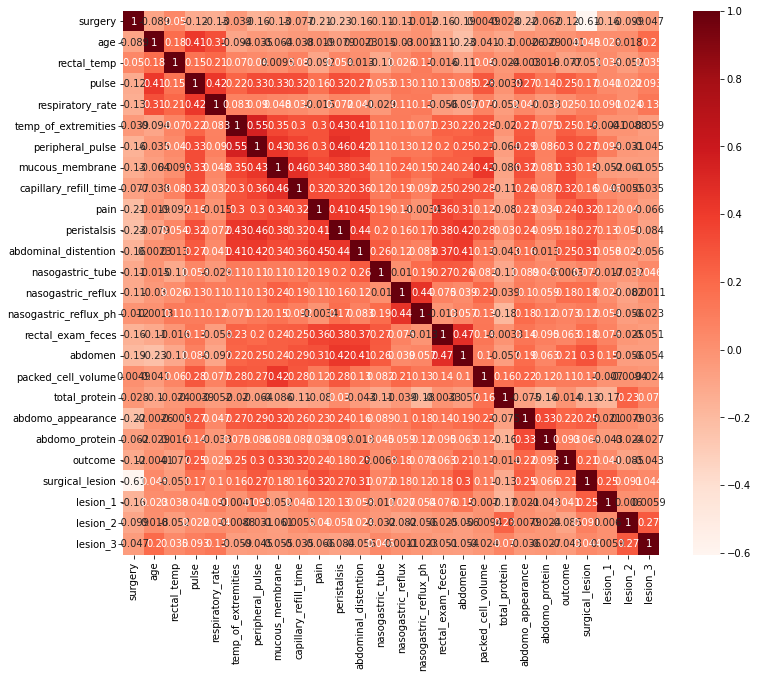

In [153]:
import matplotlib.pyplot as plt
correlation=data.corr()
correlation
plt.figure(figsize=(12,10))

sns.heatmap(correlation,annot=True,cmap=plt.cm.Reds)
plt.show

In [154]:
correlation_mat = data.corr()
corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

surgery                surgical_lesion         -0.605023
surgical_lesion        surgery                 -0.605023
peripheral_pulse       temp_of_extremities      0.547458
temp_of_extremities    peripheral_pulse         0.547458
surgery                surgery                  1.000000
lesion_1               lesion_1                 1.000000
age                    age                      1.000000
rectal_temp            rectal_temp              1.000000
pulse                  pulse                    1.000000
respiratory_rate       respiratory_rate         1.000000
temp_of_extremities    temp_of_extremities      1.000000
peripheral_pulse       peripheral_pulse         1.000000
mucous_membrane        mucous_membrane          1.000000
capillary_refill_time  capillary_refill_time    1.000000
pain                   pain                     1.000000
peristalsis            peristalsis              1.000000
lesion_2               lesion_2                 1.000000
abdominal_distention   abdomina

The above gives the attributes with absolute correlation greater than 0.5 in each case.

In [155]:
dataf=((data-data.min())/(data.max()-data.min()))*20

The above normalises the data in the range 0 to 20

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


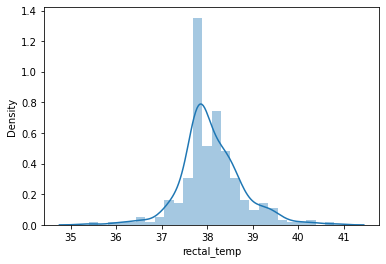

In [156]:
sns.distplot(data['rectal_temp'])

Distribution of rectal temperature in the data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


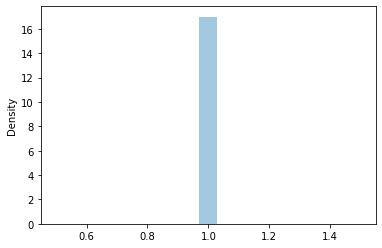

In [157]:
from sklearn import preprocessing
normalise_data= np.array(data['rectal_temp'])
normalise_data=normalise_data.reshape(-1,1)
normalise_data=preprocessing.normalize(normalise_data)
sns.distplot(normalise_data)

Distribution of rectal temperature after normalising

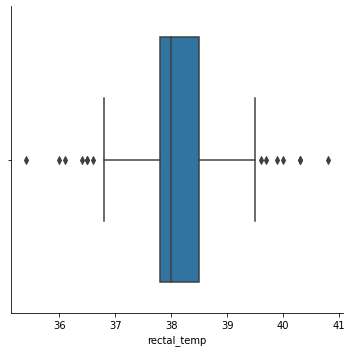

In [158]:
sns.catplot(x='rectal_temp',kind='box',data=data)

The above plot the horse temperature mostly lies between 37 and 40 with a few outliers having extreme low and high temperature. This could be an indication of the horse having colic.

In [159]:
for x in ['rectal_temp']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = 37.5
    data.loc[data[x] > max,x] = 38.5

Removing the outliers in the above data column

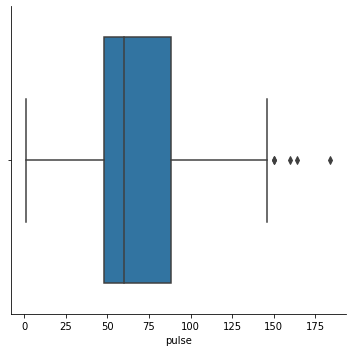

In [160]:
sns.catplot(x='pulse',kind='box',data=data)

Rectal temperature attribute after removing a few outliers.

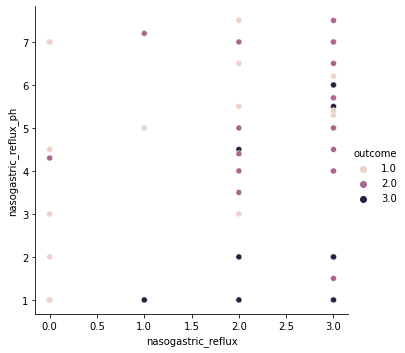

In [161]:
sns.relplot(x='nasogastric_reflux',y='nasogastric_reflux_ph',hue='outcome',data=data)

When the reflux is more few horses show high ph in the reflux of 6 or 7. 

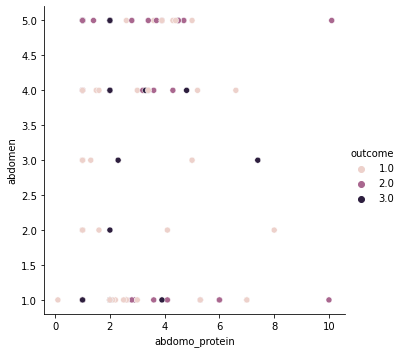

In [162]:
sns.relplot(x='abdomo_protein',y='abdomen',hue='outcome',data=data)

The above plot euthanised horses in general showed high protein in the abdomen with a few euthanised horses showing big abdomen with less protein

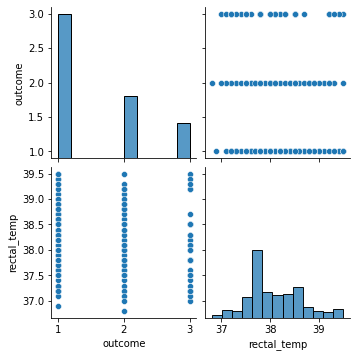

In [163]:
sns.pairplot(data[['outcome','rectal_temp']])

<BarContainer object of 299 artists>

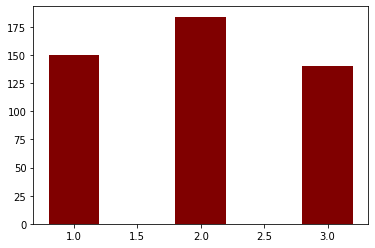

In [164]:
plt.bar(data['outcome'], data['pulse'], color ='maroon',
        width = 0.4)

The above plots dead horses showing higher pulse during colic with a pulse of 175.

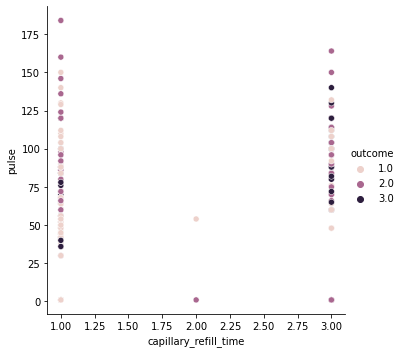

In [165]:
sns.relplot(x='capillary_refill_time',y='pulse',hue='outcome',data=data)

# Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [166]:

Selected_features = ['surgery', 'age', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein','surgical_lesion',
       'abdomo_appearance', 'abdomo_protein',
       'lesion_1', 'lesion_2', 'lesion_3']
X = data[Selected_features]
y = data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

The  above is used to extract the features relevant to the presence of colicin the horse.

# Build the model (use scikit learn), Summarize the model, Prediction, Evaluate the model 

In [167]:
from sklearn.linear_model import LogisticRegression

In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

print('Score: {:.2f}'.format(classifier.score(X_test,y_test))) 

[[35  4  2]
 [ 9  8  1]
 [13  2  1]]
Score: 0.59


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [175]:
print('Misclassification rate: {:.2f}'.format(1-classifier.score(X_test,y_test))) 

Misclassification rate: 0.41


In [171]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


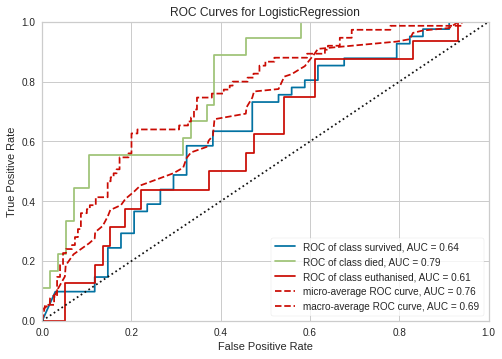

In [174]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(classifier, classes=["survived", "died","euthanised"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()    


Results:
1. The data analysis showed the horses that died due to colic had a high pulse rate, high abdomen size and a high pH.
2. The horses that survived showed a moderate pulse rate.
3. The removal of null values gave the following results at each stage:

    a. Dropping of null values simply gave a score of 33%

    b. Replacing the null values with 0 gave a score of 55%

    c. Dropping few columns and cleaning the outliers gave a score of 59%
4. The logistic regression model was used to predict the outcome of a colic infected horse
5. Missclassification rate is 0.41
6. The AUC of survived class is 0.64, died class is 0.79, euthanised class is 0.61.
7. The model has classified the died class the best among all classes.